# Ridge Regression Implementation

This notebook implements ridge regression as explained in the video transcript. Ridge regression is a regularization technique used to prevent overfitting in linear regression models.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

## 1. Understanding Ridge Regression

Ridge regression adds a penalty term to the ordinary least squares objective function:

Regular linear regression minimizes: $\sum(y_i - \hat{y}_i)^2$

Ridge regression minimizes: $\sum(y_i - \hat{y}_i)^2 + \lambda\sum m_j^2$

Where $\lambda$ (lambda) is the regularization parameter, and $m_j$ are the coefficients.

## 2. Load the Diabetes Dataset

The video uses the diabetes dataset which has 10 input columns and 1 target column.

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Display basic information about the dataset
print(f"Features: {diabetes.feature_names}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Train a Linear Regression Model (No Regularization)

In [4]:
# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on train and test data
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate R2 scores
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Linear Regression - Training R2 Score: {train_r2_lr:.4f}")
print(f"Linear Regression - Testing R2 Score: {test_r2_lr:.4f}")
print(f"Coefficients: {lr_model.coef_}")

Linear Regression - Training R2 Score: 0.5279
Linear Regression - Testing R2 Score: 0.4526
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


## 4. Train Ridge Regression Models with Different Alpha Values

In sklearn, the ridge regression parameter is called alpha, which corresponds to λ (lambda) in the equation.

In [5]:
# Define alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0, 200.0]

# Store results
results = []

for alpha in alphas:
    # Create and train a Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_ridge = ridge_model.predict(X_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    
    # Calculate R2 scores
    train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
    test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
    
    # Store results
    results.append({
        'alpha': alpha,
        'train_r2': train_r2_ridge,
        'test_r2': test_r2_ridge,
        'coefficients': ridge_model.coef_
    })
    
    print(f"Ridge (alpha={alpha}) - Training R2 Score: {train_r2_ridge:.4f}")
    print(f"Ridge (alpha={alpha}) - Testing R2 Score: {test_r2_ridge:.4f}")

Ridge (alpha=0.1) - Training R2 Score: 0.5206
Ridge (alpha=0.1) - Testing R2 Score: 0.4609
Ridge (alpha=1.0) - Training R2 Score: 0.4424
Ridge (alpha=1.0) - Testing R2 Score: 0.4192
Ridge (alpha=10.0) - Training R2 Score: 0.1633
Ridge (alpha=10.0) - Testing R2 Score: 0.1612
Ridge (alpha=100.0) - Training R2 Score: 0.0223
Ridge (alpha=100.0) - Testing R2 Score: 0.0122
Ridge (alpha=200.0) - Training R2 Score: 0.0114
Ridge (alpha=200.0) - Testing R2 Score: 0.0004


## 5. Visualize the Results

Comparing the impact of different alpha values on model performance

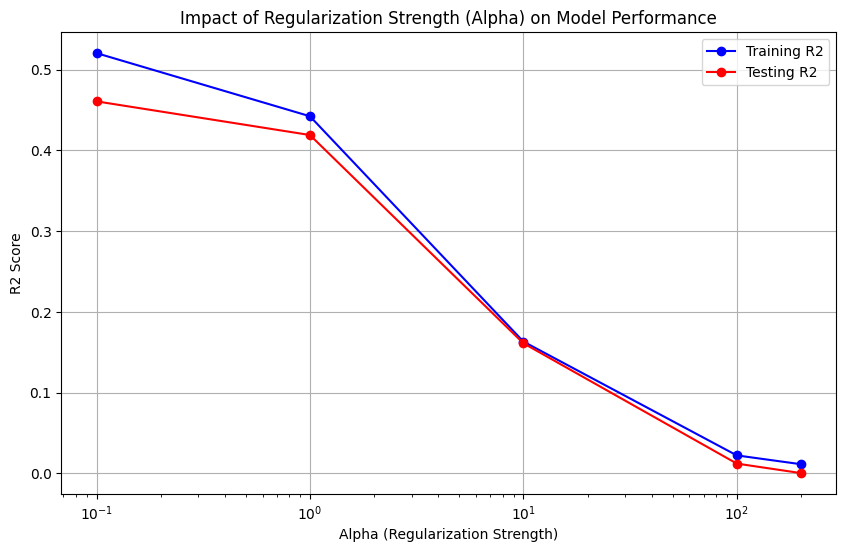

In [6]:
# Plot R2 scores vs alpha
plt.figure(figsize=(10, 6))
plt.plot([r['alpha'] for r in results], [r['train_r2'] for r in results], 'bo-', label='Training R2')
plt.plot([r['alpha'] for r in results], [r['test_r2'] for r in results], 'ro-', label='Testing R2')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R2 Score')
plt.title('Impact of Regularization Strength (Alpha) on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

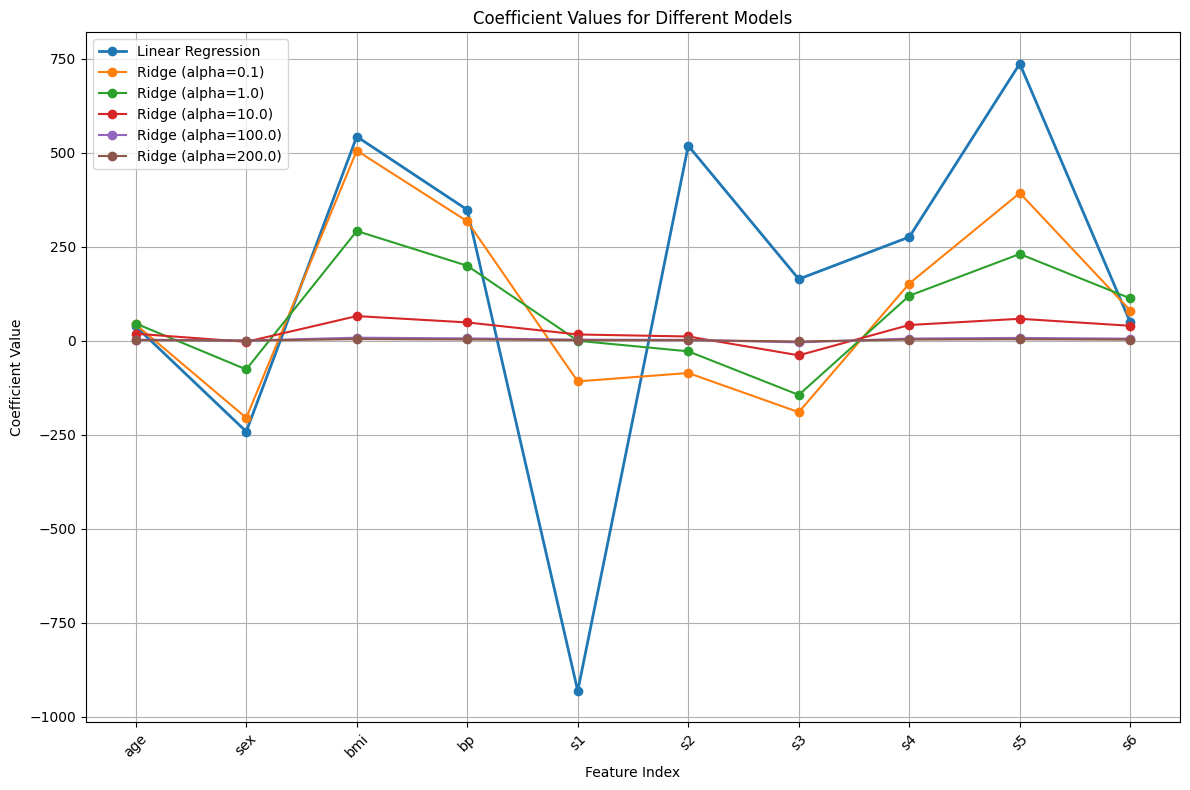

In [7]:
# Visualize coefficient values for different alphas
plt.figure(figsize=(12, 8))

# First, plot linear regression coefficients
plt.plot(range(X.shape[1]), lr_model.coef_, 'o-', label='Linear Regression', linewidth=2)

# Then plot ridge regression coefficients for different alphas
for r in results:
    plt.plot(range(X.shape[1]), r['coefficients'], 'o-', label=f'Ridge (alpha={r["alpha"]})')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values for Different Models')
plt.legend()
plt.grid(True)
plt.xticks(range(X.shape[1]), diabetes.feature_names, rotation=45)
plt.tight_layout()
plt.show()

## 6. Manual Implementation of Ridge Regression

In [8]:
class ManualRidgeRegression:
    def __init__(self, alpha=1.0, iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.coefficients = None
        self.intercept = None
        
    def fit(self, X, y):
        # Add column of ones for intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        n_samples, n_features = X_b.shape
        
        # Initialize coefficients (including intercept)
        theta = np.random.randn(n_features)
        
        # Gradient descent
        for iteration in range(self.iterations):
            # Compute predictions
            y_pred = X_b.dot(theta)
            
            # Compute gradient of MSE plus ridge penalty
            # Note: we don't regularize the intercept (theta[0])
            gradient = 2/n_samples * X_b.T.dot(y_pred - y) + 2 * self.alpha * np.r_[0, theta[1:]]
            
            # Update parameters
            theta = theta - self.learning_rate * gradient
        
        # Store coefficients
        self.intercept = theta[0]
        self.coefficients = theta[1:]
        
    def predict(self, X):
        return X.dot(self.coefficients) + self.intercept
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [9]:
# Normalize the data for our manual implementation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test our manual implementation with different alpha values
manual_results = []

for alpha in [0.1, 1.0, 10.0, 100.0, 200.0]:
    # Create and train our manual Ridge Regression model
    manual_ridge = ManualRidgeRegression(alpha=alpha, iterations=5000, learning_rate=0.01)
    manual_ridge.fit(X_train_scaled, y_train)
    
    # Calculate R2 scores
    train_r2 = manual_ridge.score(X_train_scaled, y_train)
    test_r2 = manual_ridge.score(X_test_scaled, y_test)
    
    manual_results.append({
        'alpha': alpha,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'coefficients': manual_ridge.coefficients
    })
    
    print(f"Manual Ridge (alpha={alpha}) - Training R2 Score: {train_r2:.4f}")
    print(f"Manual Ridge (alpha={alpha}) - Testing R2 Score: {test_r2:.4f}")

Manual Ridge (alpha=0.1) - Training R2 Score: 0.5217
Manual Ridge (alpha=0.1) - Testing R2 Score: 0.4602
Manual Ridge (alpha=1.0) - Training R2 Score: 0.4598
Manual Ridge (alpha=1.0) - Testing R2 Score: 0.4316
Manual Ridge (alpha=10.0) - Training R2 Score: 0.1898
Manual Ridge (alpha=10.0) - Testing R2 Score: 0.1885
Manual Ridge (alpha=100.0) - Training R2 Score: -inf
Manual Ridge (alpha=100.0) - Testing R2 Score: -inf


/Users/p0a0221/Downloads/campusx-notes/100-days-of-machine-learning/my_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/Users/p0a0221/Downloads/campusx-notes/100-days-of-machine-learning/my_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


ValueError: Input contains NaN.

## 7. Comparison with Different Alpha Values

Now let's visualize the effect of different alpha values on the model complexity:

Linear Regression - Train R2: 0.8688, Test R2: 0.9050
Ridge (alpha=0.1) - Train R2: 0.7316, Test R2: 0.7442
Ridge (alpha=1.0) - Train R2: 0.6466, Test R2: 0.6454
Ridge (alpha=10.0) - Train R2: 0.4261, Test R2: 0.4444
Ridge (alpha=200.0) - Train R2: 0.1034, Test R2: 0.0816


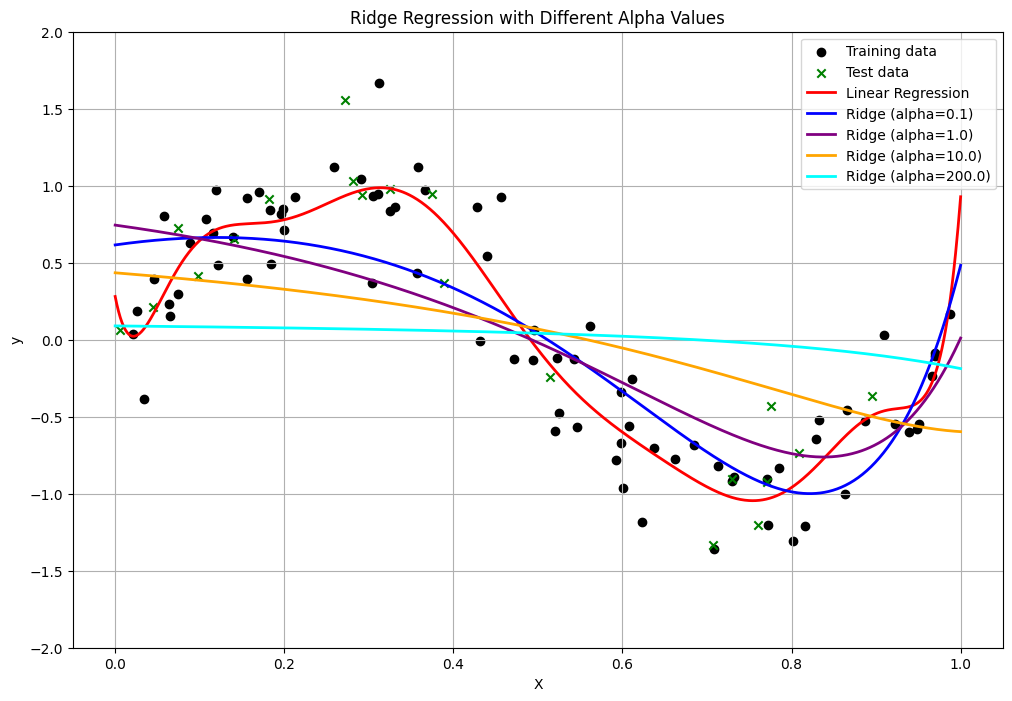

In [10]:
# Create a simple synthetic dataset for visualization
np.random.seed(42)
X_simple = np.sort(np.random.rand(100, 1), axis=0)
y_simple = np.sin(2 * np.pi * X_simple).ravel() + np.random.randn(100) * 0.3

# Split the data
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use polynomial features of degree 10 to demonstrate overfitting potential
poly = PolynomialFeatures(degree=10)
X_simple_train_poly = poly.fit_transform(X_simple_train)
X_simple_test_poly = poly.transform(X_simple_test)

# Create models with different alpha values
alphas = [0, 0.1, 1.0, 10.0, 200.0]  # 0 means no regularization (linear regression)
models = []

for alpha in alphas:
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)
    model.fit(X_simple_train_poly, y_simple_train)
    models.append((alpha, model))

# Create a grid of x values for smooth curves
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the data points
plt.scatter(X_simple_train, y_simple_train, color='black', label='Training data')
plt.scatter(X_simple_test, y_simple_test, color='green', marker='x', label='Test data')

colors = ['red', 'blue', 'purple', 'orange', 'cyan']

# Plot the model predictions
for i, (alpha, model) in enumerate(models):
    y_plot = model.predict(X_plot_poly)
    label = 'Linear Regression' if alpha == 0 else f'Ridge (alpha={alpha})'
    plt.plot(X_plot, y_plot, color=colors[i], linewidth=2, label=label)
    
    # Calculate and display R2 scores
    train_score = model.score(X_simple_train_poly, y_simple_train)
    test_score = model.score(X_simple_test_poly, y_simple_test)
    print(f"{label} - Train R2: {train_score:.4f}, Test R2: {test_score:.4f}")

plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-2, 2)
plt.title('Ridge Regression with Different Alpha Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## 8. Conclusion

As demonstrated in this notebook, Ridge regression helps prevent overfitting by adding a penalty term to the loss function. The parameter alpha (or lambda) controls the strength of this regularization:

- With alpha = 0, we get ordinary linear regression which can overfit
- As alpha increases, the model becomes simpler (coefficients get smaller)
- Too large alpha values can lead to underfitting

The optimal alpha value depends on the specific dataset and should be determined through cross-validation.

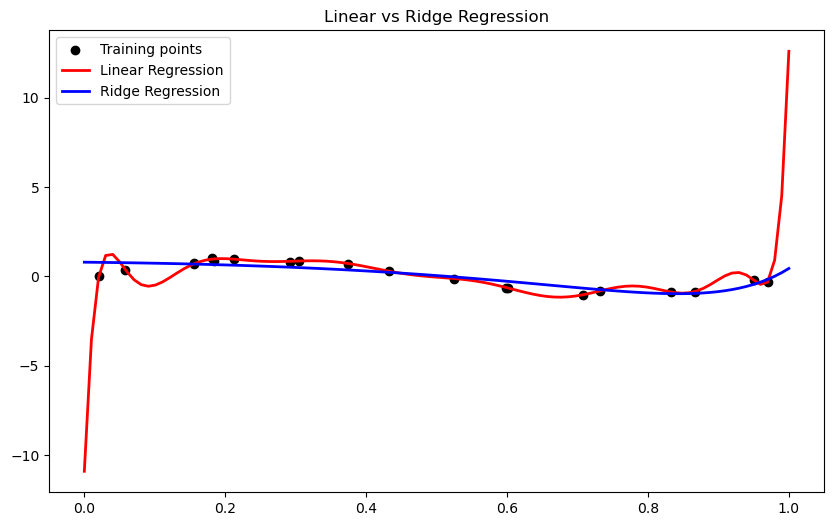

Linear Regression coefficients (absolute sum): [0.00000000e+00 9.98053454e+02 3.07900702e+04 4.73230614e+05
 4.30754211e+06 2.56455747e+07 1.06321077e+08 3.20353788e+08
 7.22962305e+08 1.24552535e+09 1.64806961e+09 1.65691478e+09
 1.22527103e+09 6.25967004e+08 1.96154580e+08 2.82362341e+07]
Ridge Regression coefficients (absolute sum): [0.         0.4145429  1.52126076 1.08933978 0.50910439 0.0812345
 0.18479297 0.33168878 0.39994283 0.41899153 0.40851637 0.38120684
 0.3450778  0.30510791 0.26433013 0.2245399 ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Synthetic data create karna
np.random.seed(42)
X = np.sort(np.random.rand(20, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(20) * 0.1  # Thoda noise add kiya

# Test points for smooth curve
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

# Polynomial features banayenge (high degree = overfitting potential)
degree = 15  # High degree polynomial

# Models create karenge
lr_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))

# Models ko train karenge
lr_model.fit(X, y)
ridge_model.fit(X, y)

# Predictions
y_lr = lr_model.predict(X_plot)
y_ridge = ridge_model.predict(X_plot)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Training points')
plt.plot(X_plot, y_lr, color='red', label='Linear Regression', linewidth=2)
plt.plot(X_plot, y_ridge, color='blue', label='Ridge Regression', linewidth=2)
plt.legend()
plt.title('Linear vs Ridge Regression')
plt.show()

# Coefficients compare karenge
lr_coef = lr_model.named_steps['linearregression'].coef_
ridge_coef = ridge_model.named_steps['ridge'].coef_

print("Linear Regression coefficients (absolute sum):", np.abs(lr_coef))
print("Ridge Regression coefficients (absolute sum):", np.abs(ridge_coef))

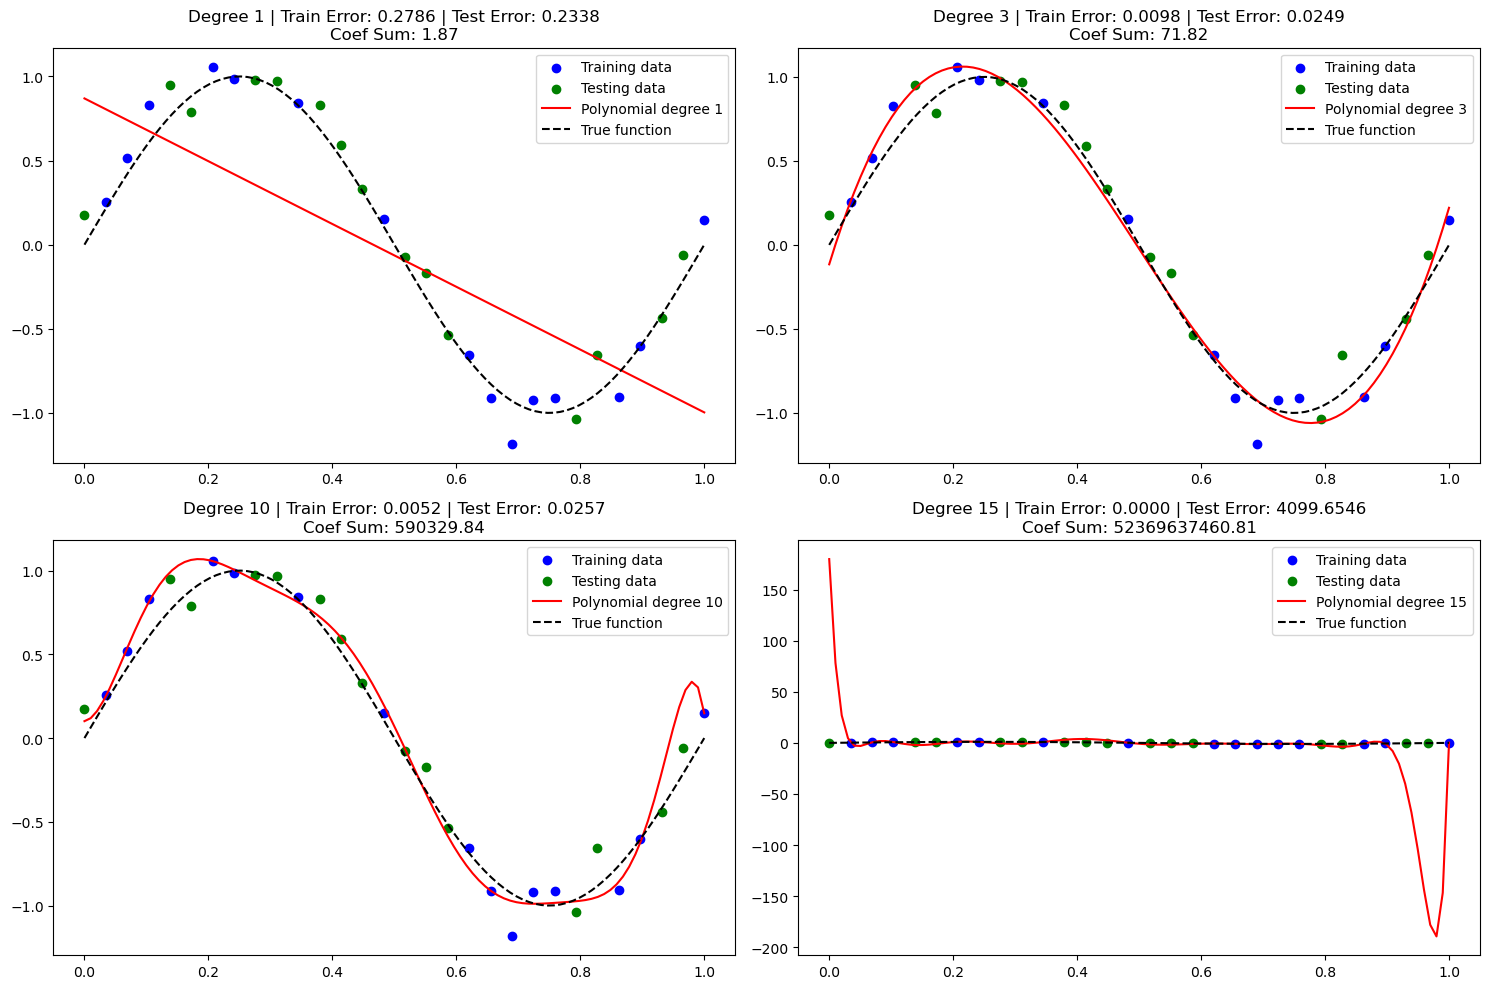

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Simple wavy function with noise
np.random.seed(0)
X = np.linspace(0, 1, 30).reshape(-1, 1)
y_true = np.sin(2 * np.pi * X).ravel()  # True relationship
y = y_true + np.random.normal(0, 0.1, size=y_true.shape)  # Add noise

# Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create increasingly complex models
models = []
degrees = [1, 3, 10, 15]  # Increasing complexity
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)

plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.transform(X_plot)

    # Train linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Get predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_plot = model.predict(X_plot_poly)

    # Calculate training and testing errors
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - model.predict(X_test_poly))**2)

    # Print coefficient magnitude (a measure of complexity)
    coef_magnitude = np.sum(np.abs(model.coef_))

    # Display results
    plt.subplot(2, 2, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Testing data')
    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial degree {degree}')
    plt.plot(X_plot, np.sin(2 * np.pi * X_plot), 'k--', label='True function')
    plt.title(f'Degree {degree} | Train Error: {train_error:.4f} | Test Error: {test_error:.4f}\nCoef Sum: {coef_magnitude:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()